   # IMPLEMENTING ADABOOST ALGORITHM

In [1]:
#import library packages
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset
data = pd.read_csv("data.csv")

In [4]:
df = data.dropna()

In [5]:
del df['sl_no']
del df['patient_number']
del df['chol_hdl_ratio']
del df['height']
del df['weight']
del df['waist']
del df['hip']

In [6]:
df.columns

Index(['cholesterol', 'glucose', 'hdl_chol', 'age', 'gender', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist_hip_ratio', 'diabetes'],
      dtype='object')

In [7]:
df.head()

,cholesterol,glucose,hdl_chol,age,gender,bmi,systolic_bp,diastolic_bp,waist_hip_ratio,diabetes
0,193,77,49,19,female,22.5,118,70,0.84,No diabetes
1,146,79,41,19,female,26.4,108,58,0.83,No diabetes
2,217,75,54,20,female,29.3,110,72,0.89,No diabetes
3,226,97,70,20,female,19.6,122,64,0.79,No diabetes
4,164,91,67,20,female,20.2,122,86,0.82,No diabetes


In [8]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['gender']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [9]:
df.head()

,cholesterol,glucose,hdl_chol,age,gender,bmi,systolic_bp,diastolic_bp,waist_hip_ratio,diabetes
0,193,77,49,19,0,22.5,118,70,0.84,No diabetes
1,146,79,41,19,0,26.4,108,58,0.83,No diabetes
2,217,75,54,20,0,29.3,110,72,0.89,No diabetes
3,226,97,70,20,0,19.6,122,64,0.79,No diabetes
4,164,91,67,20,0,20.2,122,86,0.82,No diabetes


In [10]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='diabetes', axis=1)
#Response variable
y = df.loc[:,'diabetes']  

In [11]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  546
Number of test dataset:  234
Total number of dataset:  780


##### Implementing AdaBoostClassifier Algo

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training

In [13]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
predicted = ada.predict(X_test)

Finding Accuracy

In [14]:
accuracy = accuracy_score(y_test,predicted)
print('Accuracy of AdaBoostClassifier',accuracy*100)

Accuracy of AdaBoostClassifier 94.44444444444444


Finding Clasiification Report

In [15]:
cr = classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

    Diabetes       0.93      0.69      0.79        36
 No diabetes       0.95      0.99      0.97       198

    accuracy                           0.94       234
   macro avg       0.94      0.84      0.88       234
weighted avg       0.94      0.94      0.94       234



Finding Confusion matrix

In [16]:
cm = confusion_matrix(y_test,predicted)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[ 25  11]
 [  2 196]]


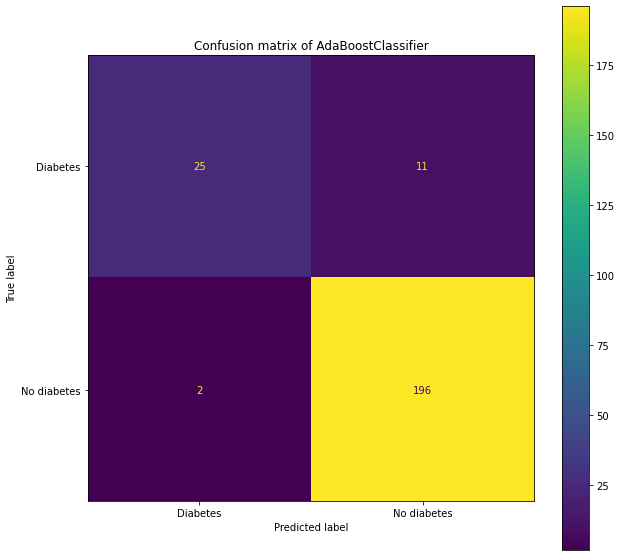

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(ada, X_test, y_test, ax=ax)
plt.title('Confusion matrix of AdaBoostClassifier')
plt.show()

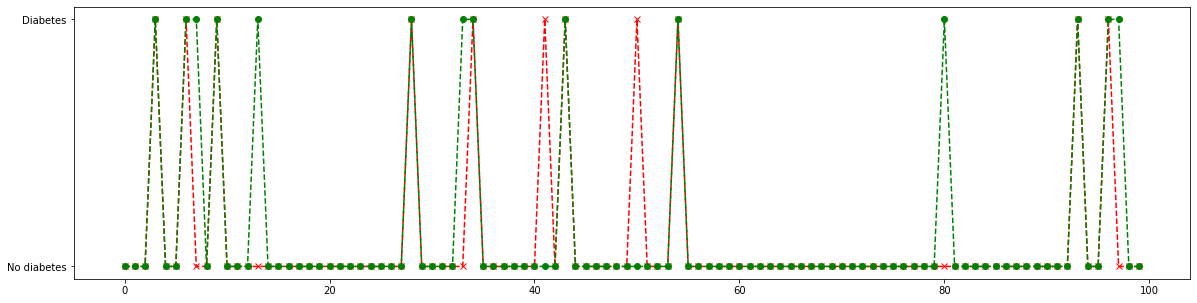

In [18]:
import matplotlib.pyplot as plt

df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()